In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import math
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt; plt.rcdefaults()


from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split 

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model



import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense


from sklearn.impute import SimpleImputer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
data= pd.read_csv('/content/gdrive/MyDrive/research/crash prediction/dataset/borg_traces_data.csv')

In [ ]:
data.head()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [ ]:
colList = []
for i in data.columns:
  colList.append(i)
  print(i)

Unnamed: 0
time
instance_events_type
collection_id
scheduling_class
collection_type
priority
alloc_collection_id
instance_index
machine_id
resource_request
constraint
collections_events_type
user
collection_name
collection_logical_name
start_after_collection_ids
vertical_scaling
scheduler
start_time
end_time
average_usage
maximum_usage
random_sample_usage
assigned_memory
page_cache_memory
cycles_per_instruction
memory_accesses_per_instruction
sample_rate
cpu_usage_distribution
tail_cpu_usage_distribution
cluster
event
failed


In [4]:
drop_list = ['Unnamed: 0', 'end_time', 'average_usage', 'maximum_usage', 'random_sample_usage', 'assigned_memory', 'page_cache_memory', 'cycles_per_instruction', 'memory_accesses_per_instruction', 'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution', 'cluster']

In [5]:
for i in drop_list:
  data.drop([i],axis=1,inplace=True)


In [ ]:
data.head(10)

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,...,collections_events_type,user,collection_name,collection_logical_name,start_after_collection_ids,vertical_scaling,scheduler,start_time,event,failed
0,0,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",...,2,fn8Ve4Tdl/FVVvwXFGIKe4+Wo4zLjUL/557qdFVYu5M=,Hzsv/gF8CPQXdqpsfovDTC1TJNyphDxPu7vaTeNxA74=,YCuhYrnORLiUh9WGL5q5tkBevfwtucSnFr2qPZh6Kes=,[],1.0,0.0,274800000000,FAIL,1
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",...,2,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,hDGffcrF/rhQQEG8Uns/RMUK7R15DXjFnRasoKFhefI=,wcRcAMuop2OqH9EW4feH919tadFec5a11ply0hcS/C8=,[],2.0,0.0,1800713000000,FAIL,1
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",...,6,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,kk6+maA6fvAdJ+VTU8AcpzQPTyVrx+ySt0MXRAyO8FU=,zCA2dl2PDptd82Hob906gE82JHzx0SbqA4mZurqZdmY=,[],2.0,1.0,81300000000,SCHEDULE,0
3,0,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",...,2,8qRmTJas/6XEBaA0l4Wt1+/qSLgc6p7u7JzoMSuT/M8=,fypwFjdqaQPSxCfeqVPCBAvFcnntmkRpQxwQ/vJsCxU=,uNjMQD1+DL9IgCFckx8lHOsCbyvLgKmZCmRjiyWZNhk=,[],2.0,0.0,1075500000000,FAIL,1
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",...,3,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,WS2kraTQdfsFtOIepw9SIo7ETi2ag8uwy7gt2MrpIe0=,VJ0ExwthLLpbqbyOA77EoNypzEiPYg3mECxUve0GCnY=,[],3.0,0.0,1565315000000,FINISH,0
5,1626744497194,6,235085571060,0,0,103,0,345,34202965855,"{'cpus': 0.0615234375, 'memory': 0.00540924072...",...,6,xlapNnqYDKgT7u9TD2X4dy8GpkM+D+v7FNzWXsBLeyc=,996RtMs3FHUuWlsGfE7/2aXRbePcVcf0kpYi2F+Byq8=,lX8LtVRuA/L7yyr6x3zVEWCoN3xxDzgcYXShuh9KUZU=,[],3.0,1.0,1626600000000,SCHEDULE,0
6,130721370174,0,275444626052,1,0,117,0,13138,10129440520,"{'cpus': 0.00566864013671875, 'memory': 0.0015...",...,0,jW2GJpOlCheoSzGcwfmRjkjV6mYZo4DC43ej/X/OyjM=,dofW6DHLUdjD9tYkZ/hat2bA6+e2GD+yBwbpmUgPLks=,Q+ko0Cb6Sy8WkHKRTMcgJQz2RhdSkBtrNnARybcK4k8=,[],1.0,0.0,343800000000,ENABLE,0
7,2373350421416,3,193223725812,2,0,103,0,393,447672988,"{'cpus': 0.022003173828125, 'memory': 0.001501...",...,3,062wDMRDwqEvJU9SCE4WQ4ShulGBVG8WGeEcNoN23GA=,ZzY6C4/jBIeLrGNhYjEtwYJejtfAq9iSPeoA6gwV5Wg=,592j9ILjNCrNYFRzL91wGpX5mwQqY531R/tbmkwtYag=,[],2.0,1.0,455400000000,FINISH,0
8,1970214287222,0,236368116431,0,0,0,0,19760,4236232523,"{'cpus': 0.0081024169921875, 'memory': 0.00361...",...,0,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,EVN94d9fIFzR7ApTSdBG8VyV7YEmR+GB2LpjJ7QtWlM=,uXg7PS0QinS0hu2jPMkHebkDJpZMywmqm/pOwvdFE5s=,[],1.0,0.0,2249100000000,ENABLE,0
9,2212203898561,6,296992962690,0,0,103,0,90,20826141104,"{'cpus': 0.09716796875, 'memory': 0.0067672729...",...,6,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,4DMSCSr0O5pS09a++837RBUKtU21fttQGZN21mMBdq8=,QfYje8/3xU2t5LPD0FCVHwPzpCSTu5C/08Ps5jQ28qc=,[],2.0,1.0,2101200000000,SCHEDULE,0


<Axes: >

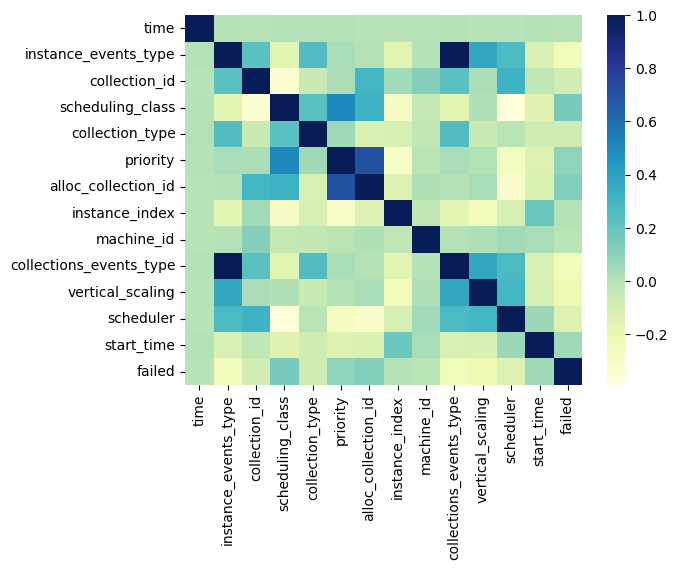

In [ ]:
sns.heatmap(data.corr(), cmap = 'YlGnBu')

In [6]:
f = [i for i in data.columns]
print(f)

['time', 'instance_events_type', 'collection_id', 'scheduling_class', 'collection_type', 'priority', 'alloc_collection_id', 'instance_index', 'machine_id', 'resource_request', 'constraint', 'collections_events_type', 'user', 'collection_name', 'collection_logical_name', 'start_after_collection_ids', 'vertical_scaling', 'scheduler', 'start_time', 'event', 'failed']


In [7]:
categorical_col = []

for i in data.columns:
  if type(data[i][0]) == np.str:
    categorical_col.append(i)
    

<ipython-input-7-1f18b9bbfad4>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data[i][0]) == np.str:


In [8]:
print(categorical_col)

['resource_request', 'constraint', 'user', 'collection_name', 'collection_logical_name', 'start_after_collection_ids', 'event']


In [9]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
labelling = LabelEncoder()
for i in categorical_col:
  data[i] = labelling.fit_transform(data[i])

In [10]:

count = 0
for i in data.columns:
  if type(data[i][0]) == np.str:
    count+=1
print(count)

0


<ipython-input-10-1cfb3fc2438f>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data[i][0]) == np.str:


In [11]:
X = data.drop('failed',axis=1)
y = data['failed']

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

#Applied ML, DL algorithm


In [13]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.9 MB/s eta 0:00:00


In [14]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split





cat = CatBoostClassifier()
cat.fit(X_train, y_train, verbose=100)
y_pred_cat = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cat)
cat_score = accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Learning rate set to 0.121715
0:	learn: 0.2729908	total: 116ms	remaining: 1m 56s
100:	learn: 0.0000769	total: 6.15s	remaining: 54.7s
200:	learn: 0.0000767	total: 18.2s	remaining: 1m 12s
300:	learn: 0.0000767	total: 31.9s	remaining: 1m 14s
400:	learn: 0.0000767	total: 39.2s	remaining: 58.5s
500:	learn: 0.0000767	total: 45.8s	remaining: 45.6s
600:	learn: 0.0000767	total: 53.6s	remaining: 35.6s
700:	learn: 0.0000767	total: 59.7s	remaining: 25.5s
800:	learn: 0.0000767	total: 1m 7s	remaining: 16.8s
900:	learn: 0.0000767	total: 1m 14s	remaining: 8.14s
999:	learn: 0.0000767	total: 1m 21s	remaining: 0us
Accuracy: 100.00%


In [15]:
instance_events_type_all_value = []
scheduling_class_all_value = []
collections_events_type_all_value = []
scheduler_all_value = []

for i in X['instance_events_type']:
  if i not in instance_events_type_all_value:
      instance_events_type_all_value.append(i)

for i in X['scheduling_class']:
  if i not in scheduling_class_all_value:
      scheduling_class_all_value.append(i)

for i in X['collections_events_type']:
  if i not in collections_events_type_all_value:
      collections_events_type_all_value.append(i)

for i in X['scheduler']:
  if i not in scheduler_all_value:
      scheduler_all_value.append(i)

In [16]:
print(instance_events_type_all_value )
print(scheduling_class_all_value)
print(collections_events_type_all_value)
print(scheduler_all_value)
scheduler_all_value=[0,1]

[2, 6, 3, 0, 1, 5, 4, 9, 8, 10]
[3, 2, 0, 1]
[2, 6, 3, 0, 1, 5, 4, 9, 8, 10]
[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [17]:
print(scheduler_all_value)

[0, 1]


In [18]:
def algo(job):
  model = cat
  result = model.predict(job)
  instance_events_type = instance_events_type_all_value
  collections_events_type = collections_events_type_all_value 
  scheduler = scheduler_all_value
  warning = {}

  if result == 0:
    warning['resolve_status'] = 0
    return warning
  else:
    flag = False
    for k in collections_events_type:
      for l in scheduler:
        job['collections_events_type'] = k
        job['instance_events_type'] = k
        job['scheduler'] = l
        solution = model.predict(job)
        if solution == 0:
            warning['resolve_status'] = 1
            warning['collections_events_type'] = k
            warning['instance_events_type'] = k
            warning['scheduler'] = l
            flag = True
            return warning
            

    if not flag:
        warning['resolve_status'] = -1
        return warning







In [19]:
print(X_test.loc[X_test.index[0]])
  

time                          0.000000e+00
instance_events_type          2.000000e+00
collection_id                 1.577929e+11
scheduling_class              2.000000e+00
collection_type               0.000000e+00
priority                      1.030000e+02
alloc_collection_id           0.000000e+00
instance_index                1.397000e+03
machine_id                    1.796952e+11
resource_request              1.320100e+04
constraint                    0.000000e+00
collections_events_type       2.000000e+00
user                          8.680000e+02
collection_name               5.220000e+02
collection_logical_name       1.622000e+03
start_after_collection_ids    3.300000e+01
vertical_scaling              1.000000e+00
scheduler                     1.000000e+00
start_time                    2.382000e+12
event                         2.000000e+00
Name: 331628, dtype: float64


In [20]:
print(y_test.loc[y_test.index[0]])



1


In [21]:
print(algo(X_test.loc[X_test.index[2]]))

{'resolve_status': 1, 'collections_events_type': 6, 'instance_events_type': 6, 'scheduler': 0}


/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [22]:
algo_out = []
actual_out = []
for i in range(len(X_test)):
  actual_out.append(y_test.loc[y_test.index[i]])
  dic = algo(X_test.loc[X_test.index[i]])
  if dic['resolve_status'] == 0:
    algo_out.append(0)
  elif dic['resolve_status'] == 1:
    algo_out.append(0)
  else:
    algo_out.append(y_test.loc[y_test.index[i]])

In [23]:
one_count = 0
algo_rate = 0
actual_rate = 0



for i in algo_out:
  if i == 1:
    one_count+=1

algo_rate = one_count/len(algo_out)

one_count = 0

for i in actual_out:
  if i == 1:
    one_count+=1

actual_rate = one_count/len(actual_out)
  

In [24]:
print(f'Cloud Failure Rate (Using proposed Algorithm): {algo_rate*100} %')
print(f'Cloud Failure Rate (without Algorithm) {actual_rate*100} %')

Cloud Failure Rate (Using proposed Algorithm): 0.0 %
Cloud Failure Rate (without Algorithm) 22.74233484029121 %
